<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Covid_death_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid", color_codes=True, rc={'figure.figsize':(10,6)})
%matplotlib inline


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

# Mounting drive onto notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading and preprocessing

In [4]:
# loading dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/Covid Data.csv")

In [5]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.shape

(1048575, 21)

In [7]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [9]:
# Null count of each column
df.isna().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [10]:
# Counting duplicate rows
df.duplicated().sum()

812049

In [11]:
print("Unique Values in Columns")
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

Unique Values in Columns
USMER: 2
MEDICAL_UNIT: 13
SEX: 2
PATIENT_TYPE: 2
DATE_DIED: 401
INTUBED: 4
PNEUMONIA: 3
AGE: 121
PREGNANT: 4
DIABETES: 3
COPD: 3
ASTHMA: 3
INMSUPR: 3
HIPERTENSION: 3
OTHER_DISEASE: 3
CARDIOVASCULAR: 3
OBESITY: 3
RENAL_CHRONIC: 3
TOBACCO: 3
CLASIFFICATION_FINAL: 7
ICU: 4


In [12]:
# Checking datewise count of dead people
df[df['DATE_DIED'] != '9999-99-99']['DATE_DIED'].value_counts()

,count
DATE_DIED,
06/07/2020,1000
07/07/2020,996
13/07/2020,990
16/06/2020,979
16/07/2020,938
...,...
26/02/2021,1
11/02/2021,1
10/02/2021,1


In [13]:
print("Modes of each Categorical Column")
for col in df.columns:
  if df[col].nunique()<10:
    print(f"{col}: {df[col].mode()}")
    print()

Modes of each Categorical Column
USMER: 0    2
Name: USMER, dtype: int64

SEX: 0    1
Name: SEX, dtype: int64

PATIENT_TYPE: 0    1
Name: PATIENT_TYPE, dtype: int64

INTUBED: 0    97
Name: INTUBED, dtype: int64

PNEUMONIA: 0    2
Name: PNEUMONIA, dtype: int64

PREGNANT: 0    97
Name: PREGNANT, dtype: int64

DIABETES: 0    2
Name: DIABETES, dtype: int64

COPD: 0    2
Name: COPD, dtype: int64

ASTHMA: 0    2
Name: ASTHMA, dtype: int64

INMSUPR: 0    2
Name: INMSUPR, dtype: int64

HIPERTENSION: 0    2
Name: HIPERTENSION, dtype: int64

OTHER_DISEASE: 0    2
Name: OTHER_DISEASE, dtype: int64

CARDIOVASCULAR: 0    2
Name: CARDIOVASCULAR, dtype: int64

OBESITY: 0    2
Name: OBESITY, dtype: int64

RENAL_CHRONIC: 0    2
Name: RENAL_CHRONIC, dtype: int64

TOBACCO: 0    2
Name: TOBACCO, dtype: int64

CLASIFFICATION_FINAL: 0    7
Name: CLASIFFICATION_FINAL, dtype: int64

ICU: 0    97
Name: ICU, dtype: int64



In [14]:
print("Unique Values in Categorical Columns")
for col in df.columns:
  if df[col].nunique()<10:
    print(f"{col}: \n{df[col].value_counts()}")
    print()

Unique Values in Categorical Columns
USMER: 
USMER
2    662903
1    385672
Name: count, dtype: int64

SEX: 
SEX
1    525064
2    523511
Name: count, dtype: int64

PATIENT_TYPE: 
PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

INTUBED: 
INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64

PNEUMONIA: 
PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

PREGNANT: 
PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

DIABETES: 
DIABETES
2     920248
1     124989
98      3338
Name: count, dtype: int64

COPD: 
COPD
2     1030510
1       15062
98       3003
Name: count, dtype: int64

ASTHMA: 
ASTHMA
2     1014024
1       31572
98       2979
Name: count, dtype: int64

INMSUPR: 
INMSUPR
2     1031001
1       14170
98       3404
Name: count, dtype: int64

HIPERTENSION: 
HIPERTENSION
2     882742
1     162729
98      3104
Name: count, dtype: int64

OTHER_DISEASE: 
OTHER_DISEASE
2     10154

<Axes: xlabel='PREGNANT', ylabel='count'>

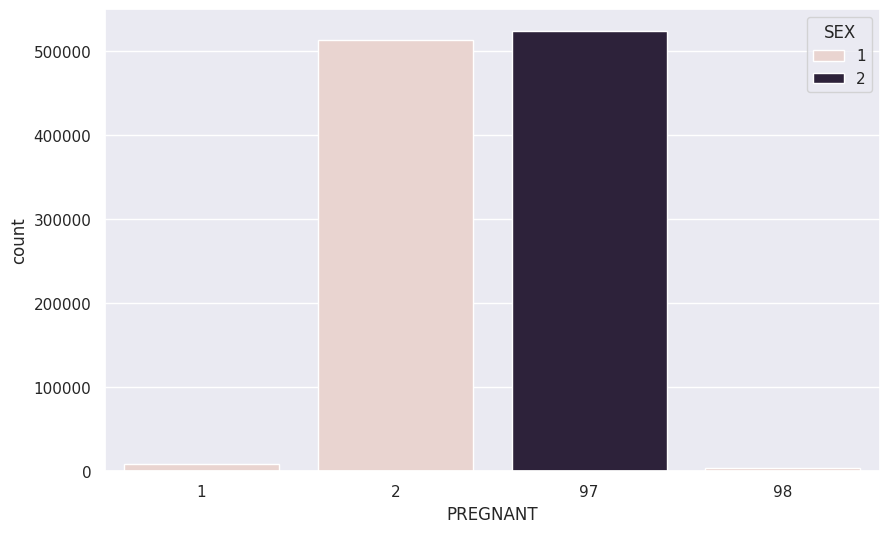

In [15]:
sns.countplot(x='PREGNANT', hue='SEX', data=df)

In [16]:
# checking gender of people who has 97 value in pregnant column
df[df['PREGNANT']==97]['SEX'].value_counts()

,count
SEX,
2,523511


In [17]:
# Checking gender count of people who has 1 in 'PREGNANT' column
df[df['PREGNANT']==1]['SEX'].value_counts()

,count
SEX,
1,8131


In [18]:
# Checking gender count of people who has 2 in 'PREGNANT' column
df[df['PREGNANT']==2]['SEX'].value_counts()

,count
SEX,
1,513179


In [19]:
# Checking gender count of people who has 2 in 'PREGNANT' column
df[df['PREGNANT']==98]['SEX'].value_counts()

,count
SEX,
1,3754


In [20]:
df['AGE'].unique()

array([ 65,  72,  55,  53,  68,  40,  64,  37,  25,  38,  24,  30,  48,
        23,  80,  61,  54,  59,  45,  26,  32,  49,  39,  27,  57,  20,
        56,  47,  50,  46,  43,  28,  33,  16,  62,  58,  36,  44,  66,
        52,  51,  35,  19,  90,  34,  22,  29,  14,  31,  42,  15,   1,
         0,  17,  41,   2,  10,  12,  13,   4,   7,   6,   8,  60,   5,
        63,  75,  81,  67,  18,  70,  88,  85,  92,  73,  74,  78,  76,
        82,  77,  86,  71,  95,  87,  83,  84,  79,  69,  89,   3,  97,
        93, 100,  91,  21, 103,  11,   9,  94,  96, 101, 107, 102,  98,
        99, 109, 119, 116, 105, 104, 111, 114, 120, 106, 108, 110, 118,
       117, 121, 115, 113])

In [21]:
df['MEDICAL_UNIT'].value_counts()

,count
MEDICAL_UNIT,
12,602995
4,314405
6,40584
9,38116
3,19175
8,10399
10,7873
5,7244
11,5577


In [22]:
# Removing ICU and INTUBED column as there are more than 50% invalid values
df = df[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
        'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
        'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
        'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']]

In [23]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,97,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,97,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,97,1,2,2,2,1,2,2,2,2,2,3


In [24]:
# Replacing value 97 and 98 by 2, as 2 depicting not pregnant and pregnant value
# 97 has only gender 2 which is men. and for 98 there are very few women who are
# considered as not pregnant as maximum women are not pregnant.
df['PREGNANT'].replace({97:2, 98:2}, inplace=True)

In [25]:
# replacing noise with null values
df[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
        'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
        'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
        'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']] = df[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
        'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
        'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
        'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']].replace({98:np.nan, 99:np.nan})

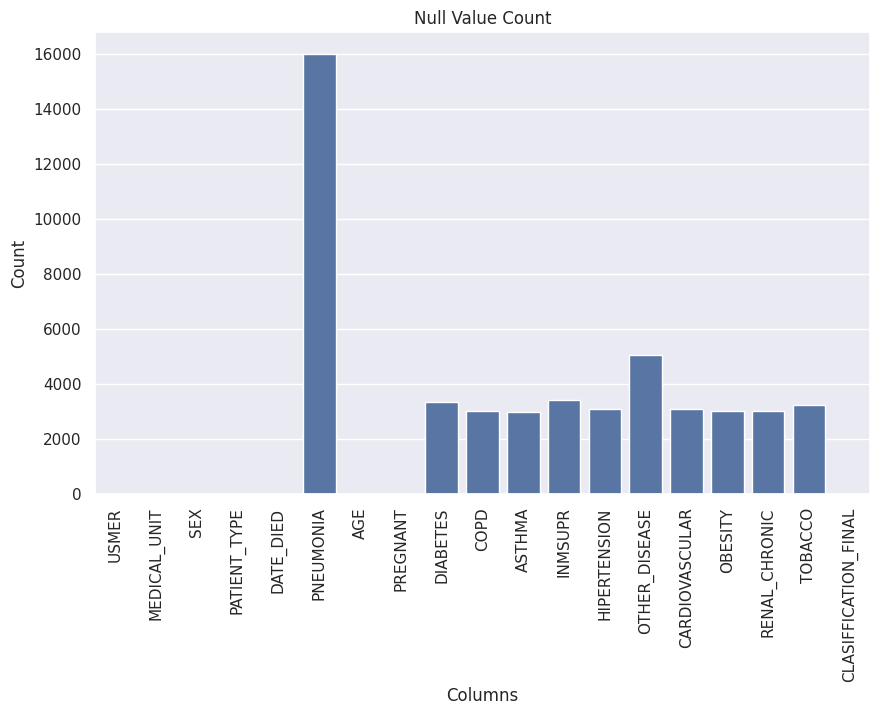

In [26]:
null_value_count = sns.barplot(x=df.isna().sum().index, y=df.isna().sum())
null_value_count.set_xticklabels(null_value_count.get_xticklabels(), rotation=90)
null_value_count.set_title("Null Value Count")
null_value_count.set_xlabel("Columns")
null_value_count.set_ylabel("Count")
plt.show()

In [27]:
# Count null values
df.isna().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
PNEUMONIA,16003
AGE,0
PREGNANT,0
DIABETES,3338
COPD,3003


In [28]:
# dropping null values
df.dropna(inplace=True)

In [29]:
df.shape

(1025152, 19)

In [30]:
# Created column died, if patient is died then 1 else 0.
df['DIED'] = df['DATE_DIED'].apply(lambda x: 0 if x=='9999-99-99' else 1)

In [31]:
# Checking duplicate row count
df.duplicated().sum()

811369

In [32]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'DIED'],
      dtype='object')

In [33]:
# Dropping DATE_DIED column as it is not required.
df.drop('DATE_DIED', axis=1, inplace=True)

In [34]:
# Creating dataframe with unique values
df_unique = df.drop_duplicates()
df_unique.shape

(181678, 19)

In [35]:
# Checking value counts of target variable from dataset of unique values
df_unique['DIED'].value_counts()

,count
DIED,
0,140995
1,40683


In [36]:
# Checking value counts of target variable
df['DIED'].value_counts()

,count
DIED,
0,950438
1,74714


In [37]:
print("Unique Values in Categorical Columns")
for col in df_unique.columns:
  if df_unique[col].nunique()<10:
    print(f"{col}: \n{df_unique[col].value_counts()}")
    print()

Unique Values in Categorical Columns
USMER: 
USMER
2    100436
1     81242
Name: count, dtype: int64

SEX: 
SEX
2    95502
1    86176
Name: count, dtype: int64

PATIENT_TYPE: 
PATIENT_TYPE
2    91540
1    90138
Name: count, dtype: int64

PNEUMONIA: 
PNEUMONIA
2.0    113818
1.0     67860
Name: count, dtype: int64

PREGNANT: 
PREGNANT
2    178953
1      2725
Name: count, dtype: int64

DIABETES: 
DIABETES
2.0    122356
1.0     59322
Name: count, dtype: int64

COPD: 
COPD
2.0    168527
1.0     13151
Name: count, dtype: int64

ASTHMA: 
ASTHMA
2.0    166680
1.0     14998
Name: count, dtype: int64

INMSUPR: 
INMSUPR
2.0    170124
1.0     11554
Name: count, dtype: int64

HIPERTENSION: 
HIPERTENSION
2.0    110077
1.0     71601
Name: count, dtype: int64

OTHER_DISEASE: 
OTHER_DISEASE
2.0    163550
1.0     18128
Name: count, dtype: int64

CARDIOVASCULAR: 
CARDIOVASCULAR
2.0    164758
1.0     16920
Name: count, dtype: int64

OBESITY: 
OBESITY
2.0    127712
1.0     53966
Name: count, dtype: int64



['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DIED',
        'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
        'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
        'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']

<Axes: xlabel='AGE', ylabel='Count'>

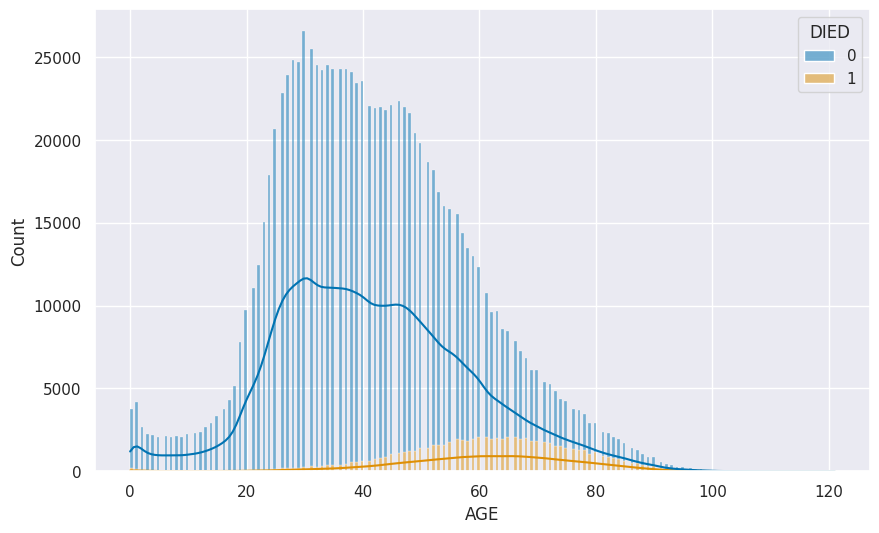

In [38]:
sns.histplot(data=df, x='AGE', hue='DIED', multiple='stack', palette='colorblind', kde=True)

Text(0.5, 1.0, 'MEDICAL_UNIT')

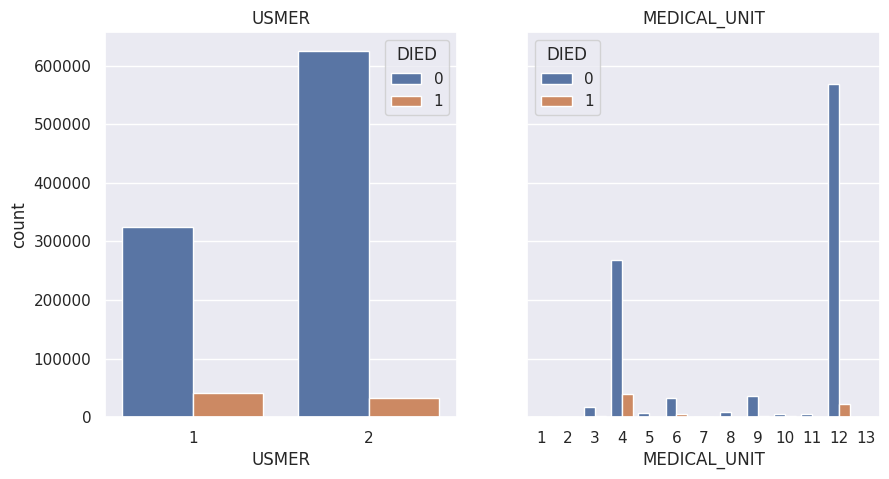

In [39]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))

sns.countplot(ax=axes[0], x='USMER', hue='DIED', data=df)
axes[0].set_title("USMER")

sns.countplot(ax=axes[1], x='MEDICAL_UNIT', data=df, hue='DIED')
axes[1].set_title("MEDICAL_UNIT")

Text(0.5, 1.0, 'PATIENT_TYPE')

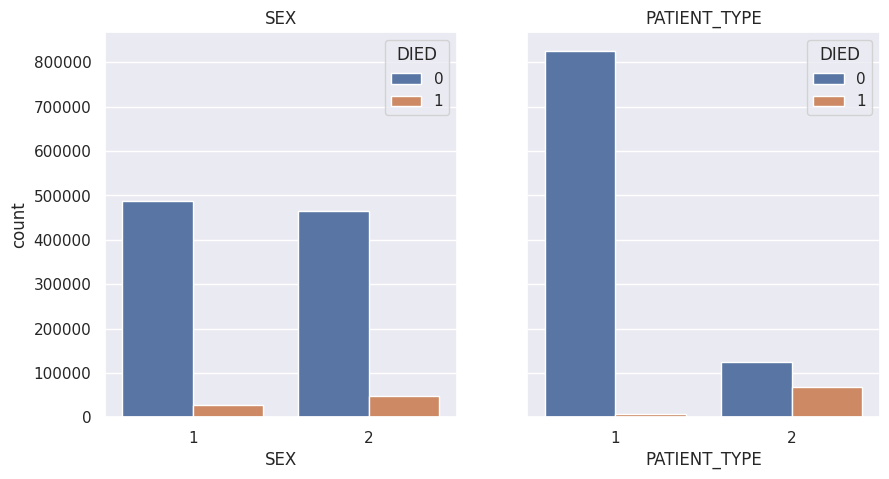

In [40]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))

sns.countplot(ax=axes[0], x='SEX', hue='DIED', data=df)
axes[0].set_title("SEX")

sns.countplot(ax=axes[1], x='PATIENT_TYPE', data=df, hue='DIED')
axes[1].set_title("PATIENT_TYPE")

Text(0.5, 1.0, "'PREGNANT'")

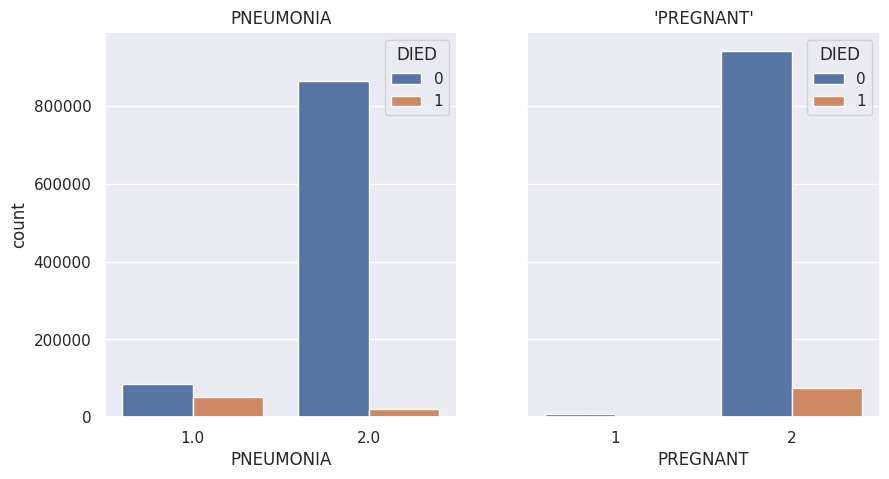

In [41]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))

sns.countplot(ax=axes[0], x='PNEUMONIA', hue='DIED', data=df)
axes[0].set_title("PNEUMONIA")

sns.countplot(ax=axes[1], x='PREGNANT', data=df, hue='DIED')
axes[1].set_title("'PREGNANT'")

In [42]:
# Spliting data into independent and dependent variables
X = df.drop('DIED', axis=1)
y = df['DIED']

In [43]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820121, 18), (205031, 18), (820121,), (205031,))

In [45]:
# Training model on train data
model = RandomForestClassifier(n_estimators=7, criterion="entropy", min_samples_leaf=20)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=20, n_estimators=7)

In [46]:
# Predication on train and test data
Y_Train_pred = model.predict(X_train)
Y_Test_pred = model.predict(X_test)

In [47]:
# Checking accuracy of model on train Data.
accuracy_score(y_train,Y_Train_pred)

0.9426462680506901

In [48]:
# Checking accuracy of model on test data.
accuracy_score(y_test,Y_Test_pred)

0.9410284298471938

In [49]:
# Spliting data with unique values into independent and dependent variables
X = df_unique.drop('DIED', axis=1)
y = df_unique['DIED']

In [50]:
X.shape, y.shape

((181678, 18), (181678,))

In [51]:
# Splitting data with unique values into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((145342, 18), (36336, 18), (145342,), (36336,))

In [53]:
# Train model on train data
model = RandomForestClassifier(n_estimators=11, min_samples_leaf=10)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=11)

In [54]:
# Predict on train and test data
Y_Train_pred = model.predict(X_train)
Y_Test_pred = model.predict(X_test)

In [55]:
# Checking accuracy of model on train data.
accuracy_score(y_train,Y_Train_pred)

0.8211735080018164

In [56]:
# Checking accuracy of model on test data.
accuracy_score(y_test,Y_Test_pred)

0.8029777630999559